<a href="https://colab.research.google.com/github/haima2209/COGNIZANT_DATA_ANALYSIS/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3 - Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, refer to the `modeling_walkthrough.ipynb` notebook.


## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We want to use dataframes once again to store and manipulate the data.

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [ ]:
path = "/content/sales.csv"
sales_df = pd.read_csv(path)
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_df = pd.read_csv("/content/sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df = pd.read_csv("/content/sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

In [ ]:
stock_df['estimated_stock_pct']=stock_df['estimated_stock_pct'].astype(float)
temp_df['temperature']=temp_df['temperature'].astype(float)

In [ ]:
sales_df.describe()


,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:
sales_agg=sales_df.groupby(['timestamp','product_id','unit_price']).agg({'quantity':'sum'}).reset_index()
sales_agg.head(5)

,timestamp,product_id,unit_price,quantity
0,2022-03-01 09:00:13,9e71fa82-7be2-4320-abd6-f8bc65b41913,1.99,3
1,2022-03-01 09:00:18,049b2171-0eeb-4a3e-bf98-0c290c7821da,2.49,3
2,2022-03-01 09:00:28,04da844d-8dba-4470-9119-e534d52a03a0,0.49,4
3,2022-03-01 09:00:42,6232cdff-0954-496a-b645-09c79abbd6e0,8.99,1
4,2022-03-01 09:01:06,6fdec15b-fd57-4920-a84f-211532cbe46a,7.19,4


In [ ]:
stock_agg=stock_df.groupby(['timestamp','product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57


In [ ]:
temp_agg=temp_df.groupby(['timestamp']).agg({'temperature':'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:08,-2.45
1,2022-03-01 09:00:23,1.85
2,2022-03-01 09:00:30,-2.10
3,2022-03-01 09:00:34,1.00
4,2022-03-01 09:00:35,-1.93


In [ ]:
merge_df=stock_agg.merge(sales_agg,on=['timestamp','product_id'],how='left')
merge_df.head(7)

,timestamp,product_id,estimated_stock_pct,unit_price,quantity
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,NaN
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN
5,2022-03-01 09:01:52,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,NaN,NaN
6,2022-03-01 09:01:56,0ec3890d-f4be-48a4-9358-291b3da7f578,0.86,NaN,NaN


In [ ]:
merged_df=merge_df.merge(temp_df,on='timestamp',how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,unit_price,quantity,id,temperature
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN,NaN,NaN
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN,NaN,NaN
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,NaN,d050c5f2-0ffc-49ee-b8a0-beef559f5b29,1.85
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN,NaN,NaN
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN,NaN,NaN


In [ ]:
merged_df.info()
merged_df.isnull().sum()
merged_df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            14998 non-null  object 
 1   product_id           14998 non-null  object 
 2   estimated_stock_pct  14998 non-null  float64
 3   unit_price           0 non-null      float64
 4   quantity             0 non-null      float64
 5   id                   1300 non-null   object 
 6   temperature          1300 non-null   float64
dtypes: float64(4), object(3)
memory usage: 937.4+ KB


,timestamp,product_id,estimated_stock_pct,unit_price,quantity,id,temperature
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,0.0,0,0.00
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,0.0,0,0.00
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,0.0,d050c5f2-0ffc-49ee-b8a0-beef559f5b29,1.85
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,0.0,0,0.00
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,0.0,0,0.00
...,...,...,...,...,...,...,...
14993,2022-03-07 19:58:18,6370633a-ac41-42a1-a29e-56c14d63786f,0.63,0.0,0.0,0,0.00
14994,2022-03-07 19:58:18,83c88e75-20c2-45b1-be9d-6cb808707dfb,0.54,0.0,0.0,0,0.00
14995,2022-03-07 19:58:35,c6ffd15f-c133-47a2-93e5-828eb4ad3e26,0.37,0.0,0.0,0,0.00
14996,2022-03-07 19:59:22,7f6922e9-b858-41c6-8765-9750bc5e8a86,0.60,0.0,0.0,0,0.00


In [ ]:
category_df=sales_df[['product_id','category']]
category_df=category_df.drop_duplicates()
price_df=sales_df[['product_id','unit_price']]
price_df=price_df.drop_duplicates()


In [ ]:
merged_df.drop(columns=['id'],inplace=True)
merged_df.head()



,timestamp,product_id,estimated_stock_pct,unit_price,quantity,temperature
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN,NaN
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN,NaN
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,NaN,1.85
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN,NaN
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN,NaN


In [ ]:
merged_df=merged_df.merge(category_df,on='product_id',how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,unit_price,quantity,temperature,category
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN,NaN,spices and herbs
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN,NaN,baked goods
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,NaN,1.85,canned foods
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN,NaN,canned foods
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN,NaN,cheese


In [ ]:
merged_df=merged_df.merge(price_df,on='product_id',how='left')
merged_df.head()


,timestamp,product_id,estimated_stock_pct,unit_price_x,quantity,temperature,category,unit_price_y
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN,NaN,spices and herbs,2.19
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN,NaN,baked goods,8.49
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,NaN,1.85,canned foods,8.99
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN,NaN,canned foods,7.49
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN,NaN,cheese,13.99


In [ ]:

merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()
merged_df.fillna(0)

,timestamp,product_id,estimated_stock_pct,unit_price_x,quantity,temperature,unit_price_y,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,0.0,0.00,2.19,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,0.0,0.00,8.49,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,0.0,1.85,8.99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,0.0,0.00,7.49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,0.0,0.00,13.99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2022-03-07 19:58:18,6370633a-ac41-42a1-a29e-56c14d63786f,0.63,0.0,0.0,0.00,2.49,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14994,2022-03-07 19:58:18,83c88e75-20c2-45b1-be9d-6cb808707dfb,0.54,0.0,0.0,0.00,4.19,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14995,2022-03-07 19:58:35,c6ffd15f-c133-47a2-93e5-828eb4ad3e26,0.37,0.0,0.0,0.00,1.19,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14996,2022-03-07 19:59:22,7f6922e9-b858-41c6-8765-9750bc5e8a86,0.60,0.0,0.0,0.00,5.99,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
merged_df.drop(columns='unit_price_x',inplace=True)
Y=merged_df['estimated_stock_pct']
X=merged_df.drop(columns=['estimated_stock_pct','product_id'])

print(X.shape)
print(Y.shape)

(14998, 26)
(14998,)


In [ ]:
X.head(10).fillna(0)


,timestamp,quantity,temperature,unit_price_y,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-01 09:00:03,0.0,0.00,2.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022-03-01 09:00:12,0.0,0.00,8.49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-03-01 09:00:23,0.0,1.85,8.99,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-01 09:00:48,0.0,0.00,7.49,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-01 09:00:53,0.0,0.00,13.99,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2022-03-01 09:01:52,0.0,0.00,11.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2022-03-01 09:01:56,0.0,0.00,4.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,2022-03-01 09:02:04,0.0,0.00,3.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2022-03-01 09:02:20,0.0,-1.00,17.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2022-03-01 09:03:23,0.0,0.00,2.99,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [ ]:
X=convert_to_datetime(X,'timestamp')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamp                       14998 non-null  datetime64[ns]
 1   quantity                        0 non-null      float64       
 2   temperature                     1300 non-null   float64       
 3   unit_price_y                    14998 non-null  float64       
 4   category_baby products          14998 non-null  uint8         
 5   category_baked goods            14998 non-null  uint8         
 6   category_baking                 14998 non-null  uint8         
 7   category_beverages              14998 non-null  uint8         
 8   category_canned foods           14998 non-null  uint8         
 9   category_cheese                 14998 non-null  uint8         
 10  category_cleaning products      14998 non-null  uint8         
 11  ca

In [ ]:
X['timestamp_day_of_month'] = X['timestamp'].dt.day
X['timestamp_day_of_week'] = X['timestamp'].dt.dayofweek
X['timestamp_hour'] = X['timestamp'].dt.hour
X.drop(columns=['timestamp'], inplace=True)
X.head()

,quantity,temperature,unit_price_y,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,...,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,NaN,NaN,2.19,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,9
1,NaN,NaN,8.49,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9
2,NaN,1.85,8.99,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,9
3,NaN,NaN,7.49,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,9
4,NaN,NaN,13.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,9


In [ ]:
X.fillna(0)

,quantity,temperature,unit_price_y,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,...,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,0.0,0.00,2.19,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,9
1,0.0,0.00,8.49,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9
2,0.0,1.85,8.99,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,9
3,0.0,0.00,7.49,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,9
4,0.0,0.00,13.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,0.0,0.00,2.49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7,0,19
14994,0.0,0.00,4.19,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,7,0,19
14995,0.0,0.00,1.19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7,0,19
14996,0.0,0.00,5.99,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,7,0,19


In [ ]:
accuracy = []
K=10
split=0.75
X.fillna(0)
for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, Y_train, Y_test = train_test_split(X.fillna(0), Y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, Y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.268
Fold 2: MAE = 0.268
Fold 3: MAE = 0.268
Fold 4: MAE = 0.269
Fold 5: MAE = 0.269
Fold 6: MAE = 0.269
Fold 7: MAE = 0.269
Fold 8: MAE = 0.269
Fold 9: MAE = 0.269
Fold 10: MAE = 0.269
Average MAE: 0.27


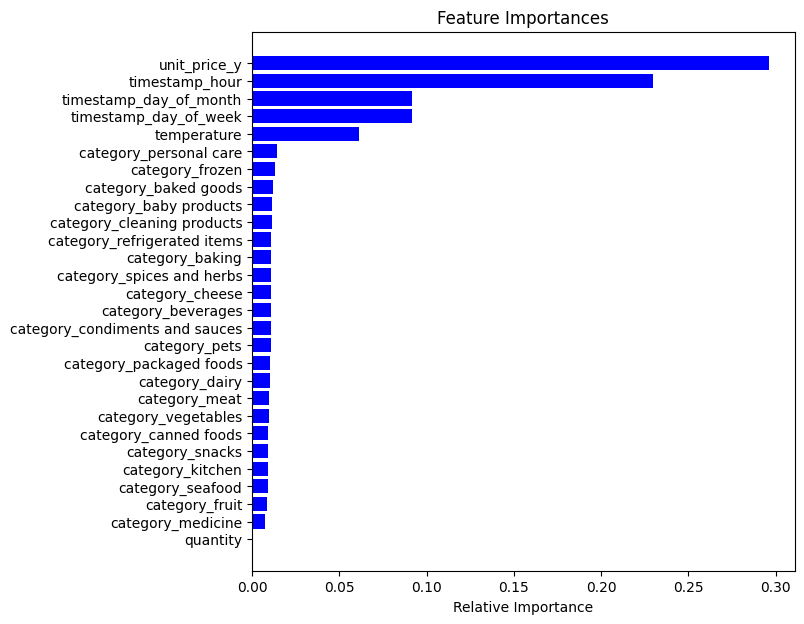

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()